<a href="https://colab.research.google.com/github/Navya-0/projects101/blob/main/mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from io import IncrementalNewlineDecoder
# example of loading the mnist dataset
'''The %matplotlib inline command tells the IPython environment to draw the plots immediately after the current cell. 
The drawn plots are shown below the code and stored in the notebook document for future reference.'''
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import  confusion_matrix
import seaborn as sns
np.random.seed(0) # so that results are constant for every iteration

In [6]:
from keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape # (60000, 28, 28) means 6000 image of 28*28 pixels size

(60000, 28, 28)

In [8]:
y_train.shape #(60000,) means 6000 labels and no pixerls dimensions as they are just numbers

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

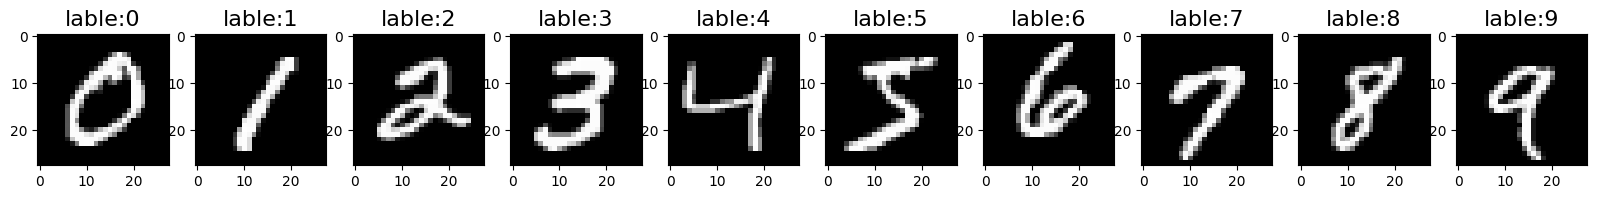

In [13]:
num_classes=  10
f , ax = plt.subplots(1,num_classes, figsize =(20,20))
for i in range (0, num_classes):
  sample = x_train[y_train == i] [0] # here zero rpresnt the first element
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title("lable:{}".format(i),fontsize=16)

In [14]:
for i in range(10):
  print(y_train[i]) 

# as these are continuos values machine will find it difficult to predict a dfinite number instead it will predict the in between values like 4.5 etc

5
0
4
1
9
2
1
3
1
4


In [15]:
# we will perform one hot encoding to solve this issue
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
for i in range(10):
  print(y_train[i]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [17]:
#normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# reshaping it into 1D array so that its easier to feed to the neural network and multiple canty be fed at a time
x_test = x_test.reshape(x_test.shape[0],-1)
x_train = x_train.reshape(x_train.shape[0],-1)
x_train.shape


(60000, 784)

In [20]:
model = Sequential() # sequential model helps to keep adding layers after layers to form a chain of nerual layers, its the easiset
model.add(Dense(units=128, input_shape=(784,),activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.25)) # drops out some nodes and thus prevent from overfitting 
model.add(Dense(units=10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [21]:
'''The batch size is a number of samples processed before the model is updated.
The number of epochs is the number of complete passes through the training dataset. 
The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.'''
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size= batch_size, epochs=epochs)
#loss decreases with every epoch and accuracy increases with every epoch

Epoch 1/10
118/118 [==============================] - 3s 13ms/step - loss: 0.6053 - accuracy: 0.8266
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2296 - accuracy: 0.9339
Epoch 3/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1671 - accuracy: 0.9511
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1335 - accuracy: 0.9610
Epoch 5/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1084 - accuracy: 0.9680
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0932 - accuracy: 0.9726
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0804 - accuracy: 0.9754
Epoch 8/10
118/118 [==============================] - 2s 19ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 9/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0606 - accuracy: 0.9818
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0530 - accura

In [22]:
test_loss, test_accuracy= model.evaluate(x_test,y_test)
test_loss
test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9763


0.9763000011444092

In [23]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.6389441e-07, 3.8281198e-07, 1.2763285e-06, ..., 9.9989957e-01,
        1.4759506e-07, 3.1121122e-05],
       [4.2076678e-08, 5.6970403e-05, 9.9993712e-01, ..., 5.4948821e-08,
        1.0777451e-06, 1.6742372e-12],
       [2.9066043e-06, 9.9574667e-01, 3.0445069e-04, ..., 1.4871436e-03,
        1.5495542e-03, 2.8908706e-05],
       ...,
       [5.2519828e-09, 5.1983429e-10, 7.7834500e-10, ..., 2.8958839e-06,
        9.2458013e-06, 4.1973137e-05],
       [5.6041071e-11, 2.1657518e-09, 1.0300332e-11, ..., 1.4325405e-08,
        1.4926740e-06, 2.8382596e-10],
       [2.4348616e-08, 1.0245921e-09, 7.4140239e-08, ..., 7.0997652e-11,
        1.3389996e-08, 4.6522622e-10]], dtype=float32)

In [24]:
y_pred_classes # what it does is chooses the index with highest probability from every list and returns the value associated with that index


array([7, 2, 1, ..., 4, 5, 6])

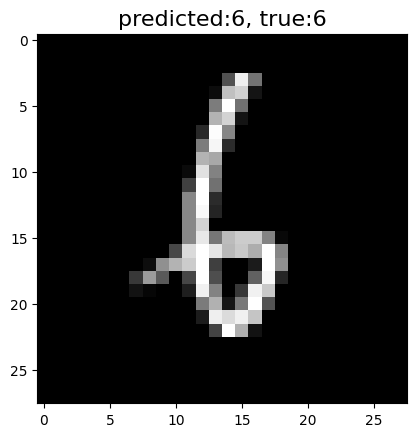

In [25]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true= y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("predicted:{}, true:{}".format(y_sample_pred_class, y_sample_true), fontsize =16)
plt.imshow(x_sample.reshape(28,28), cmap ="gray")

Text(0.5, 1.0, 'confusion matrix')

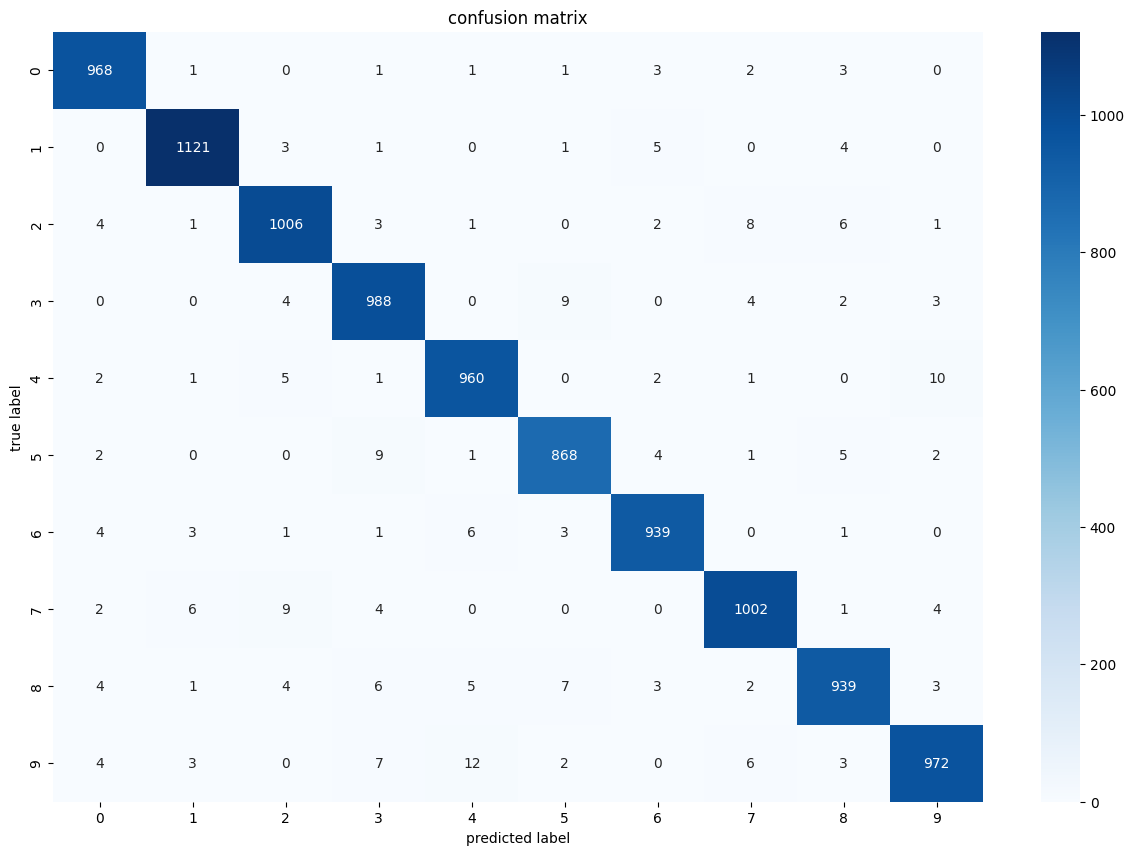

In [26]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot =True,fmt ="d", ax =ax, cmap="Blues")
ax.set_xlabel ("predicted label")
ax.set_ylabel ("true label")
ax.set_title ("confusion matrix")

In [27]:
errors = (y_pred_classes - y_true!=0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [30]:
y_pred_errors_prob= np.max(y_pred_errors, axis =1)
true_probability_errors= np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_prob- true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors= sorted_idx_diff_errors[-5:]

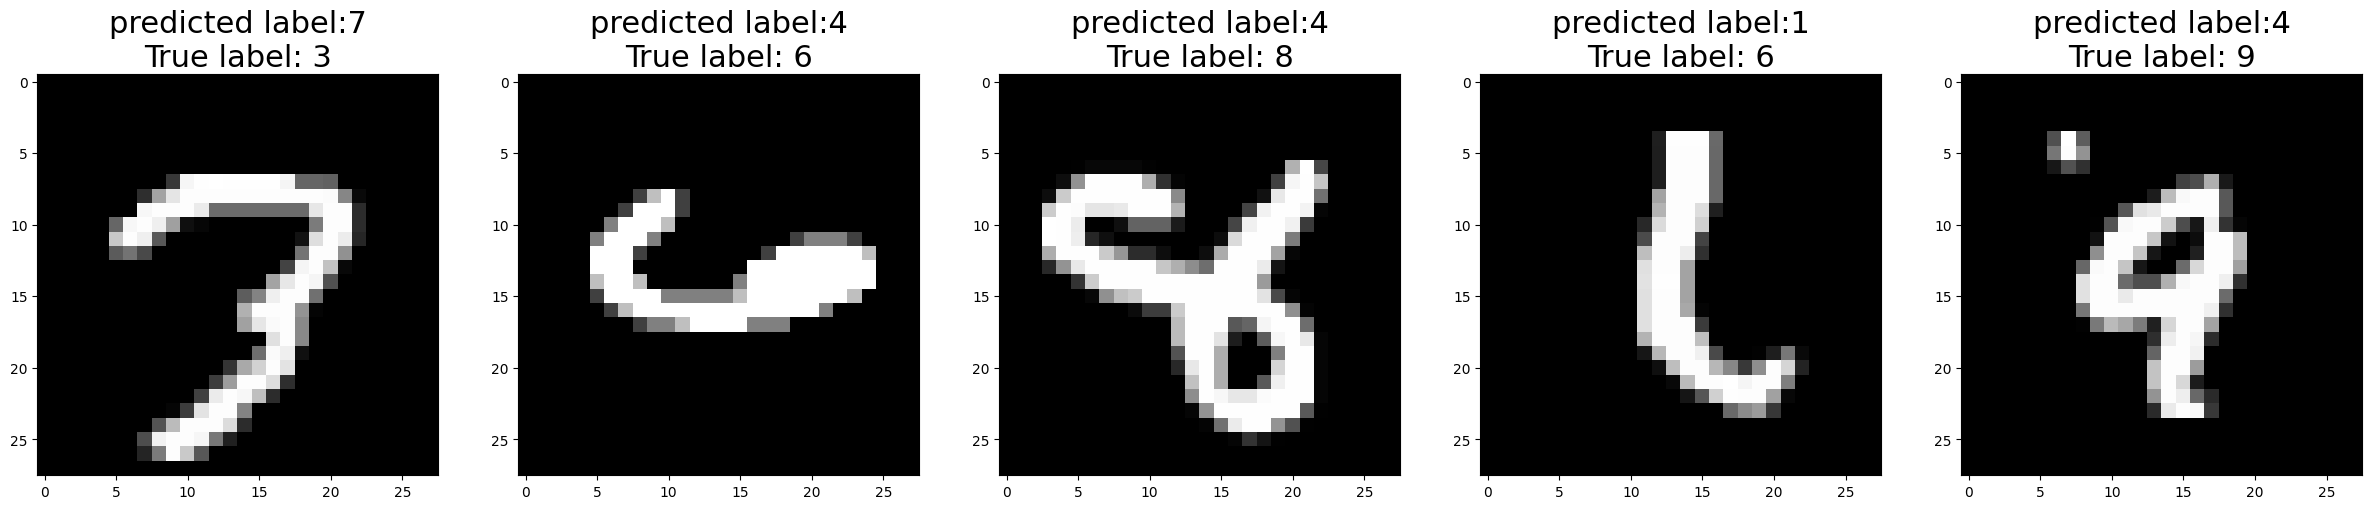

In [31]:
num= len(top_idx_diff_errors)
f,ax=plt.subplots(1,num,figsize=(30,30))

for i in range(0,num):
  idx= top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t= y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title("predicted label:{}\nTrue label: {}".format(y_p,y_t), fontsize=22)